In [1]:
from utils.card_engine import Card_Game, Card_Env, random_agent, policy_agent

import math
import random
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy

import matplotlib.pyplot as plt

from itertools import count



# global game gym
env = Card_Env()

# if GPU is to be used
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

In [2]:


def select_action(game, policy_net):
    return policy_net(game.get_network_input().to(torch.float32).to(device)).max(0).indices


def trained_QN_stats(environment, dqn, weights, num_episodes, fp):
    state = environment.game.get_network_input()
    n_input = len(state)
    n_actions = 52
    step_counts = []
    cumulative_rew = []
    policy_net = dqn(n_input, n_actions).to(device)
    policy_net.load_state_dict(weights)
    for i_episode in range(num_episodes):
        # initialize the game
        environment.reset()
        game = environment.game 
        epi_rew = []
        for t in count():
            if game.hands[game.current_player].sum(0) != 0:
                action = select_action(game, policy_net)
                observation, reward, terminated = environment.step(action, fp)
                epi_rew.append(reward)
                done = terminated
            else:
                print('A player has no cards left')
                terminated = True
                done = terminated
            if done:
                cumulative_rew.append(sum(epi_rew))
                step_counts.append(t)
                break
    x = numpy.array(step_counts)
    y = numpy.array(cumulative_rew)
    fig,axes = plt.subplots(2,figsize=(8,8))
    axes[0].plot(x)
    axes[0].set_xlabel("episode", fontsize=10)
    axes[0].set_ylabel("duration in steps", fontsize=10)
    axes[1].plot(y)
    axes[1].set_xlabel("episode", fontsize=10)
    axes[1].set_ylabel("total reward", fontsize=10)
    return x,y

C:\Users\Shin\AppData\Local\Temp\ipykernel_9784\3455078550.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fp.load_state_dict(torch.load('latest_q_function.pth', map_lo

player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is 

player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(3) is 

player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is 

player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is 

player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(2) is playing
player tensor(3) is playing
player tensor(0) is playing
player tensor(1) is playing
player tensor(3) is 

(array([3, 2, 4, 5, 6, 4, 2, 2, 4, 1, 2, 6, 3, 3, 2, 1, 4, 4, 1, 6, 1, 2,
        3, 4, 8, 5, 4, 6, 1, 4, 4, 7, 4, 4, 6, 4, 1, 7, 5, 4, 2, 4, 6, 5,
        4, 4, 9, 6, 1, 5, 5, 6, 5, 3, 2, 3, 4, 5, 5, 4, 5, 5, 2, 3, 4, 4,
        5, 3, 3, 4, 3, 6, 7, 6, 5, 3, 2, 2, 1, 2, 4, 3, 4, 5, 3, 3, 5, 6,
        5, 5, 4, 4, 2, 1, 3, 6, 1, 7, 4, 4]),
 array([ -8, -10,  -9,  -6,  -9,  -7,  -9,  -9,  -8, -10,  -9,  -7,  -9,
         -8, -10, -10,  -7,  -8, -10,  -7, -10,  -9,  -9,  -8,  -6,  -8,
         -9,  -6, -10,  -8,  -8,  -8, -10,  -9, -10,  -7, -10,  -8,  -8,
         -8, -10, -10,  -6,  -6,  -8,  -9,  -6,  -8, -10,  -9,  -6,  -9,
         -6,  -8,  -9,  -8,  -8,  -5,  -7,  -9, -10,  -9,  -9,  -8, -10,
         -7, -10,  -8,  -8,  -8,  -8,  -8,  -7,  -9,  -9, -10,  -9, -10,
        -10,  -9, -10, -10,  -9, -10,  -9,  -9,  -9,  -8,  -7,  -6,  -8,
        -10,  -9, -10,  -9,  -8, -10,  -6,  -8,  -9]))

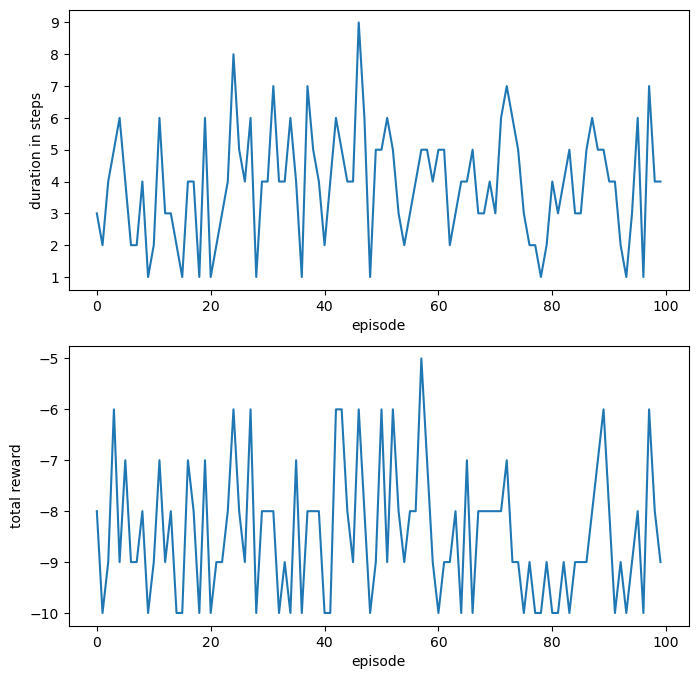

In [3]:
class DQN(nn.Module):

    # n_input: the current state
    #  (1x52)    +  (56x52)       +       (1x52): the current state
    #    ^hand       ^who plays each card  ^cards not seen yet
    #                       + cards played
    # n_output: probability of playing each card
    #   (1x52)
    def __init__(self, n_input, n_output):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_input, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_output)

    def forward(self, x):
        if x.dtype == torch.float32:
            x = F.relu(self.layer1(x))
            x = F.relu(self.layer2(x))
        else:
            x=x.to(torch.float32)
            x = F.relu(self.layer1(x))
            x = F.relu(self.layer2(x))
        return self.layer3(x)

    
n_input = len(env.game.get_network_input()) 
    
fp =  DQN(n_input, 52).to(device)
fp.load_state_dict(torch.load('latest_q_function.pth', map_location=torch.device('cpu')))


trained_QN_stats(Card_Env(), DQN,torch.load('latest_q_function.pth', map_location=torch.device('cpu')),100, fp)

C:\Users\Shin\AppData\Local\Temp\ipykernel_9784\1151879113.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('latest_q_function.pth', map_location=torch.device(

player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
player tensor(2) is playing
foreign policy found an illegal move
player tensor(1) is playing
player tensor(2) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreign policy found an illegal move
player tensor(1) is playing
foreig

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

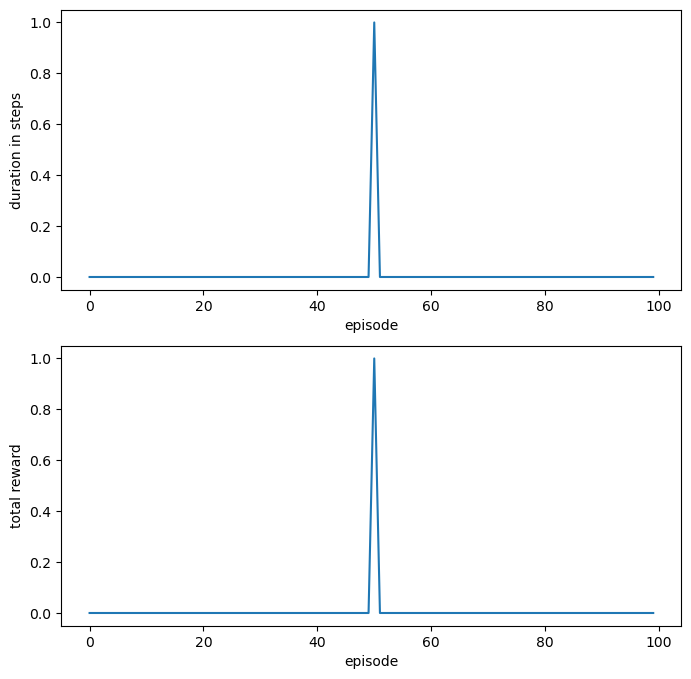

In [4]:
trained_QN_stats(Card_Env(foreign_policy = policy_agent),
                 DQN,
                 torch.load('latest_q_function.pth', map_location=torch.device('cpu')),
                 100,
                 fp)


